In [1]:
from konlpy.tag import Hannanum
import pandas as pd
def flatten(items): #2차원 리스트를 1차원 리스트로 변환
        flatList=[]
        for elem in items:
            if type(elem) == list: #자료형이 리스트이면
                for e in elem: #개별 원소를 추가
                    flatList.append(e)
            else: #리스트가 아니면 그대로 추가
                flatList.append(elem)
        return flatList

In [2]:
f=open(f'c:/data/twitter/twitter_5m.txt', encoding='utf-8')
lines = f.readlines() 
f.close()

han=Hannanum() #한나눔 패키지
temp=[]
for j in range(len(lines)):
    a=lines[j].strip() #공백,줄바꿈,탭 제거
    temp.append(han.nouns(a))

In [49]:
stopwords = ['#WednesdayWordExpo', '#thebucheon', '#大邱', '#新冠肺炎', '#新天地', '#李万熙', '#虚假报道', "'코로나19", "'코로나19'", '/20200502070024839\xa0…', '/20200505070112092\xa0…', 
'/20200519051505627\xa0…', '/20200522060602773\xa0…', '/20200528050752979\xa0…', '05.', '0명', '1.', '10', '100', '100명', '10만명', '10명', '11일', '12', '12일', '13일', '15-30만까지벌수있다', 
'15일', '1654', '1656', '1671', '1675', '1689', '1692', '18일', '19', '19일', '1년', '1만명', '1명', '1분기', '1월', '1위', '1일', '1차', '2.', '20', '2020', '2020.', '2020년', '20대', '20일', 
'23세', '25일', '28', '2년', '2명', '2배', '2월', '2주', '2차', '3.', '30', '3000만원', '30대', '31번', '3년', '3명', '3월', '3주년', '4.', '40', '4명', '4월', '4일', '5.', '5월', '5일', '6월', 
'6일', '7월', '7일', '80', 'CIX(씨아이엑스),', 'Q&A', '[코로나19', '[코로나19]', 'com', 'f=m&from=mtop\xa0…', 'f=m\xa0…', 'html\xa0…', 'idxno=730577\xa0…', 'input=tw\xa0…', '\xa0pic.', '\xa0…', 
'\xa0…pic.', '‘코로', '‘코로나19', '‘코로나19’', 'ㅅㅂ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋ', 'ㅎㅎ', 'ㅏㅏㅏㅏㅏ', 'ㅜㅜ', 'ㅠㅠ', 'ㅠㅠㅠ', 'ㅠㅠㅠㅠ', 'ㅠㅠㅠㅠㅠ', 'ㅡㅡ', '韓日', '"코로나19',
'일당15-30만~당일결제', '일당15-30만ㄱㅗ수익', '사기거절', '상다카톡', '상담카톡:', '상담톡:', '네이버', '뉴스', '뉴스1', '출처', '집에서편하', '알ㅂㅏ', '언제', '언제던연락주세요', '나이23세이상', '환영',
'계약금', '자택알ㅂㅏ', '예약금', '할수있는알ㅂㅏ', '누구']

In [50]:
word_list1=flatten(temp)
word_list2=[x for x in word_list1 if len(x)>1]
word_list3=[i for i in word_list2 if i not in stopwords]
word_list4=pd.Series(word_list3)
word_list5 = word_list4.value_counts().head(1000)

In [51]:
word_list5

코로나19    3228
걱정       1074
때문        911
다음        660
코로나       617
         ... 
일본인        18
12월        18
부동산        18
근처         18
검사거부       18
Length: 979, dtype: int64

In [52]:
result = []
for i in range(len(temp)):
    temp[i] = list(filter(lambda x : x in word_list5.index, temp[i]))
    if len(temp[i]) != 0:
        result.append(temp[i])
    else:
        pass

In [53]:
result

[['미국'],
 ['미국인', '방역', '최고', '한국', '중국', '다음뉴스'],
 ['보령시', '코로나19', '현황'],
 ['확진자'],
 ['전원', '음성'],
 ['보령시', '선별진료소'],
 ['#코로나19'],
 ['미국인', '한국'],
 ['방역'],
 ['미국'],
 ['트럼프'],
 ['발언'],
 ['비난'],
 ['마스크', '안쓰'],
 ['김정은', '피해'],
 ['바이러스', '감염', '방지', '중단', '전화', '이용'],
 ['흑흑', '노래방'],
 ['이후', '세계', '정부'],
 ['조심'],
 ['세상', '지역', '확진자'],
 ['예전'],
 ['근데'],
 ['확진자'],
 ['경향신문'],
 ['의료진들', '한번', '생각'],
 ['코로나19', '무증상', '전파', '방역당국', '생활'],
 ['시장', '실패', '코로나19', '대표', '시장', '실패'],
 ['한국의', '등교개학', '대응', '방송'],
 ['#코로'],
 ['오늘'],
 ['포스트코'],
 ['거짓말'],
 ['아베'],
 ['거짓말'],
 ['아베'],
 ['코로나19'],
 ['아베', '거짓말'],
 ['거짓말'],
 ['거짓말', '아베'],
 ['사설', '4개월', '대한민국'],
 ['지금', '생활방역', '건강'],
 ['계획'],
 ['사람들', '자제'],
 ['코로나19', '현황'],
 ['미국'],
 ['미국인', '방역', '최고', '한국', '중국', '다음뉴스'],
 ['보령시', '코로나19', '현황'],
 ['확진자'],
 ['전원', '음성'],
 ['보령시', '선별진료소'],
 ['#코로나19'],
 ['미국인', '한국'],
 ['방역'],
 ['미국'],
 ['트럼프'],
 ['발언'],
 ['비난'],
 ['마스크', '안쓰'],
 ['김정은', '피해'],
 ['바이러스', '감염', '방지', '중단', '전화', '이용'],
 ['흑흑', '노래

In [54]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
#연관규칙 분석을 하려면 자료를 트랜잭션 형태로 바꿔야 함
#x축에 전체 상품 리스트를 출력하고 구매여부를 표시
te=TransactionEncoder() 
te_ary=te.fit(result).transform(result)
print(te.columns_) #전체 상품 리스트
print(te_ary)
df=pd.DataFrame(te_ary, columns=te.columns_)
df

['"한국', '#가짜뉴스', '#댓글', '#더부천', '#면역력', '#분실폰', '#사단', '#손씻기', '#신종코로나19', '#신천지', '#신천지예수교회', '#쌍화차', '#악플', '#울산신천지여신', '#일탈', '#추락사', '#코', '#코로', '#코로나19', '#코로나19_예방', '#코로나뜻', '#코로나증상', '#팩트체크', '#확진자', "'아시", '/6675\xa0…', '/index_view_page.', '11', '12월', '14일', '2위', '483', '4개월', '4차', '60', '663', '668', '672', '8월', '9월', '[경안일보]', '[다경뉴스]', '[케이에스피뉴스]', 'svc=cafeapp\xa0…', '‘신천지', '‘틱톡', '“나부터', '“제겐', '“코로', '“코로나', '“코로나19', 'ㅎㅎㅎ', '가격', '가능', '가능성', '가슴', '가운데', '가정', '가족', '가족들', '가지', '가짜', '가짜뉴스', '가치', '각국', '간호사', '감사', '감소', '감염', '감염병', '감염자', '감염증(코로나19)', '감염증(코로나19)관련', '강남', '강력', '강제', '강제개종', '강조', '강탈', '강행', '강화', '개개인', '개발', '개인', '개최', '개학', '개학연기', '거기', '거리', '거리두', '거짓말', '걱정', '건강', '건물', '검거', '검사', '검사거부', '검찰', '검토', '것”', '것들', '게이클럽', '격리', '결과', '결정', '경각심', '경고', '경기', '경우', '경쟁', '경제', '경제적', '경찰', '경향신문', '경험', '계기', '계속', '계획', '고3', '고민', '고생', '고용', '고용보험', '고의', '고통', '공개', '공격', '공급', '공부', '공산당', '공식', '공연', '공연…‘극강', '공유', '공적', '공조

,"""한국",#가짜뉴스,#댓글,#더부천,#면역력,#분실폰,#사단,#손씻기,#신종코로나19,#신천지,...,활용,회복,회사,효과,흑흑,희망,희비,희생,＂코로,＂코로나19
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20179,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20180,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
#지지도 0.2 이상
# 각각 표의 의미와 파라미터를 다시 살펴보자
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.005, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.005500,(#가짜뉴스)
1,0.012635,(#신천지)
2,0.007135,(#코로)
3,0.022743,(#코로나19)
4,0.026558,(가능)
...,...,...
130,0.005500,"(의료진, 대구, 여비, 파견)"
131,0.005500,"(대구, 여비, 파견, 코로나19)"
132,0.005500,"(의료진, 대구, 파견, 코로나19)"
133,0.005549,"(의료진, 여비, 파견, 코로나19)"


In [91]:
from mlxtend.frequent_patterns import association_rules
# 신뢰도 0.1 이상(기본값 0.8)
rules=association_rules(frequent_itemsets, metric='confidence', min_threshold=0.9)
rules
# antecedents 선행, consequents 후행
# antecedent support : A=>B
# consequent support : B=>A
# support(지지도) : A=>B거래수 / 전체거래수
# confidence(신뢰도) : 예측의 정확성

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(여비),(대구),0.005847,0.012833,0.005500,0.940678,73.300242,0.005425,16.640811
1,(여비),(의료진),0.005847,0.010405,0.005748,0.983051,94.475868,0.005687,58.386087
2,(여비),(코로나19),0.005847,0.155881,0.005649,0.966102,6.197668,0.004737,24.901496
3,(여비),(파견),0.005847,0.006194,0.005549,0.949153,153.246373,0.005513,19.544858
4,(파견),(코로나19),0.006194,0.155881,0.005698,0.920000,5.901920,0.004733,10.551482
...,...,...,...,...,...,...,...,...,...
102,"(대구, 파견)","(의료진, 여비, 코로나19)",0.005549,0.005649,0.005500,0.991071,175.454417,0.005469,111.367357
103,"(여비, 파견)","(의료진, 대구, 코로나19)",0.005549,0.005549,0.005500,0.991071,178.587532,0.005469,111.378456
104,"(여비, 코로나19)","(의료진, 대구, 파견)",0.005649,0.005500,0.005500,0.973684,177.035088,0.005469,37.791002
105,"(파견, 코로나19)","(의료진, 대구, 여비)",0.005698,0.005500,0.005500,0.965217,175.495652,0.005469,28.591876


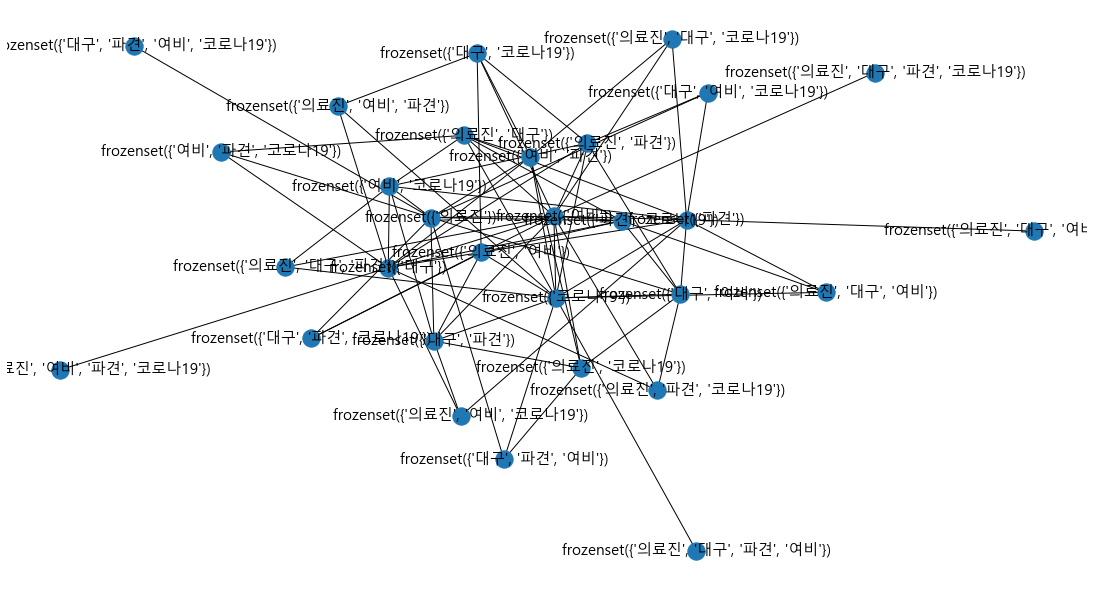

In [92]:
#pip install networkx
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import networkx as nx
# antecedents 선행, consequents 후행(결과)
ga=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(15,8))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)